<a href="https://colab.research.google.com/github/SergeyHSE/RegionAnalysis.github.io/blob/main/RegionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#######################################
# !!!!For jupyter, not for colab!!!!  #
#######################################

import pyodbc as sqlMS

connStr = (r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};" r"DBQ=C:\Users\User\Documents\книги\ВШЭ\учёба\Статистика\Анализ региона\БелгородСтаврополь.accdb;")
conn = sqlMS.connect(connStr)
cursor = conn.cursor()
strSQL = '''
SELECT БелгородскаяОбл.* FROM БелгородскаяОбл
'''
df = pd.read_sql(strSQL, conn)

cursor.close()
del cursor
conn.close()

df.to_csv('Regions.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ForColab/Regions.csv')

In [ ]:
df.head()

,Unnamed: 0,ОКТМО,Reg,Rai,Категория,ТипХоз,10001,11157,12157,11158,...,32348,11274,32126,Kf_hoz,Kf_A200,УсПог,СВ16_16,ГрСВ16_16,СВрас16,СВжив16
0,0,14605416101,14,14605,165,3,146057100465,0,0,1,...,1,0,3,1.0,1.0,0.143712,25.223959,4,7.013860,18.210098
1,1,14605416101,14,14605,165,3,146057100466,0,0,1,...,0,0,1,1.0,1.0,0.000000,71.536339,5,71.536339,0.000000
2,2,14605416101,14,14605,165,3,146057100467,0,0,1,...,1,0,2,1.0,1.0,0.199810,83.375305,5,58.056999,25.318308
3,3,14605408101,14,14605,165,3,146057102232,0,0,1,...,0,0,1,1.0,1.0,0.000000,48.643177,4,48.643177,0.000000
4,4,14605408101,14,14605,165,3,146057102233,0,0,1,...,0,0,3,1.0,1.0,0.000000,40.961994,4,40.961994,0.000000


In [ ]:
df['Rai'].value_counts()

14610    40803
14740    24856
14656    22064
14640    16955
14658    15778
14730    15416
14642    15179
14620    14977
14605    13979
14644    11529
14646    11299
14632    10061
14654     9428
14630     9004
14638     7502
14648     7343
14625     7194
14641     6981
14615     6757
14650     5914
14643     3771
14701     2963
Name: Rai, dtype: int64

In [4]:
Rai = pd.read_excel('/content/drive/MyDrive/ForColab/Районы.xlsx', header=None)

In [5]:
import re

Rai[0] = Rai[0].astype(str).str[:-3].astype(int)
Rai[1] = Rai[1].str.replace('"', '')
Rai[1] = Rai[1].str.replace(r'\s*Белгородской области\s*', ' ')
Rai[1] = Rai[1].str.replace(r'\s*Муниципальный район\s*', ' ')
Rai[1] = Rai[1].str.replace(r'\s*городской\s*', ' ')
Rai[1] = Rai[1].str.replace('муниципальный', '').str.replace('и город Алексеевка', '').str.strip()
Rai[1] = Rai[1].str.replace('и город Шебекино', '').str.strip()
Rai[1] = Rai[1].str.replace('Городской округ', '').str.strip()
Rai[1] = Rai[1].replace({'Город Валуйки и ': ''}, regex=True)
Rai[1] = Rai[1].str.replace(r'\s+', ' ')
print(Rai)

        0                        1
0   14605       Алексеевский район
1   14610       Белгородский район
2   14615        Борисовский район
3   14620          Валуйский район
4   14625       Вейделевский район
5   14630      Волоконовский район
6   14632      Грайворонский район
7   14638          Ивнянский район
8   14640        Корочанский район
9   14641        Красненский район
10  14642  Красногвардейский район
11  14643     Краснояружский район
12  14644     Новооскольский район
13  14646       Прохоровский район
14  14648        Ракитянский район
15  14650         Ровеньский район
16  14654         Чернянский район
17  14656        Шебекинский район
18  14658        Яковлевский район
19  14701           Город Белгород
20  14730         Губкинский округ
21  14740    Старооскольский округ


In [6]:
mapping = {
    14605: 'Алексеевский район',
    14610: 'Белгородский район',
    14615: 'Борисовский район',
    14620: 'Валуйский район',
    14625: 'Вейделевский район',
    14630: 'Волоконовский район',
    14632: 'Грайворонский район',
    14638: 'Ивнянский район',
    14640: 'Корочанский район',
    14641: 'Красненский район',
    14642: 'Красногвардейский район',
    14643: 'Краснояружский район',
    14644: 'Новооскольский район',
    14646: 'Прохоровский район',
    14648: 'Ракитянский район',
    14650: 'Ровеньский район',
    14654: 'Чернянский район',
    14656: 'Шебекинский район',
    14658: 'Яковлевский район',
    14701: 'Город Белгород',
    14730: 'Губкинский округ',
    14740: 'Старооскольский округ'
}

df['Region'] = df['Rai'].replace(mapping)

In [ ]:
df['Region'].value_counts()

Белгородский район         40803
Старооскольский округ      24856
Шебекинский район          22064
Корочанский район          16955
Яковлевский район          15778
Губкинский округ           15416
Красногвардейский район    15179
Валуйский район            14977
Алексеевский район         13979
Новооскольский район       11529
Прохоровский район         11299
Грайворонский район        10061
Чернянский район            9428
Волоконовский район         9004
Ивнянский район             7502
Ракитянский район           7343
Вейделевский район          7194
Красненский район           6981
Борисовский район           6757
Ровеньский район            5914
Краснояружский район        3771
Город Белгород              2963
Name: Region, dtype: int64

In [7]:
import numpy as np
np.array(df.columns)

array(['Unnamed: 0', 'ОКТМО', 'Reg', 'Rai', 'Категория', 'ТипХоз',
       '10001', '11157', '12157', '11158', '12158', '11159', '11160',
       '11168', '11161', '11169', '11170', '11204', '11205', '11206',
       '11207', '11208', '11209', '11210', '11211', '11212', '11500',
       '11501', '11502', '11503', '11504', '11505', '11506', '11507',
       '11509', '11510', '11511', '11512', '11517', '11518', '11519',
       '11520', '11530', '11531', '11532', '11533', '11535', '11536',
       '11537', '11538', '11539', '11540', '11541', '11542', '11580',
       '11581', '11582', '11583', '11584', '11585', '11586', '11587',
       '11601', '11602', '11603', '11610', '11611', '11612', '11616',
       '11617', '11618', '11619', '11620', '11621', '11622', '13605',
       '11630', '11631', '11632', '11635', '11640', '11642', '11643',
       '11641', '11644', '11645', '11646', '11647', '11650', '11660',
       '11670', '11680', '11681', '11682', '11683', '11684', '11685',
       '11686', '11687'

In [8]:
data = df[['11159', '11160', '11169', '11170', '11204', '11205',
           '11206', '11207', '11208', '11209', '11210', '11211',
           '11501', '11502', '11503', '11504', '11506',
           '11510','11517', '11518', '11537', 'Rai', 'ТипХоз',
           '11530', '11535', '11540', '11542', '11421',
           '11711', '11725', '11580', '11581', '11610', '11629',
           '11710', '11712', '11755', '11765', '11780', '11790',
           '11845', '11900', 'Region', 'Kf_hoz', 'Kf_A200']]

In [ ]:
data.isna().any().any()

False

In [ ]:
data.shape

(279753, 43)

In [9]:
rows_with_zeros = data[data.eq(0).all(axis=1)]
print(f"Количество строк со всеми нулями: {len(rows_with_zeros)}")

Количество строк со всеми нулями: 0


In [10]:
column_mapping = {
    '11159': 'Работники',
    '11169': 'Постоянные',
    '11170': 'Сезонные',
    '11160': 'В_сельхозпроизводстве',
    '11204': 'Общая_площадь',
    '11205': 'Сельскохозяйственные_угодья',
    '11206': 'Пашня',
    '11207': 'Пары',
    '11167': 'Газон_рулонный',
    '11208': 'Сенокосы',
    '11209': 'Пастбища',
    '11210': 'Многолетние_насаждения',
    '11211': 'Залежь',
    '11501': 'Зерновые_и_зернобобовые',
    '11502': 'Пшеница_озимая',
    '11503': 'Пшеница_яровая',
    '11504': 'Рожь_озимая',
    '11506': 'Ячмень_озимый',
    '11510': 'Кукуруза_на_зерно',
    '11517': 'Зернобобовые_культуры',
    '11530': 'Технические_культуры',
    '11518': 'Горох',
    '11537': 'Подсолнечник_на_зерно',
    '11542': 'Рапс яровой',
    '11535': 'Свекла_сахарная',
    '11540': 'Соя',
    '11580': 'Картофель',
    '11581': 'Овощные_и_бахчевые',
    '11610': 'Кормовые_культуры',
    '11629': 'Плодовые_и_ягодные',
    '11710': 'КРС',
    '11711': 'КРС_молоко',
    '11712': 'Коровы_молочные',
    '11725': 'КРС_мясной',
    '11755': 'Свиньи',
    '11765': 'Овцы',
    '11780': 'Козы',
    '11790': 'Птица',
    '11845': 'Лошади',
    '11421': 'Тракторы',
    '11900': 'Кролики'
}

data.rename(columns=column_mapping, inplace=True)

In [ ]:
data.columns

Index(['Работники', 'В_сельхозпроизводстве', 'Постоянные', 'Сезонные',
       'Общая_площадь', 'Сельскохозяйственные_угодья', 'Пашня', 'Пары',
       'Сенокосы', 'Пастбища', 'Многолетние_насаждения', 'Залежь',
       'Зерновые_и_зернобобовые', 'Пшеница_озимая', 'Пшеница_яровая',
       'Рожь_озимая', 'Ячмень_озимый', 'Кукуруза_на_зерно',
       'Зернобобовые_культуры', 'Горох', 'Подсолнечник_на_зерно', 'Rai',
       'ТипХоз', 'Технические_культуры', 'Свекла_сахарная', 'Соя',
       'Рапс яровой', 'Тракторы', 'КРС_молоко', 'КРС_мясной', 'Картофель',
       'Овощные_и_бахчевые', 'Кормовые_культуры', 'Плодовые_и_ягодные', 'КРС',
       'Коровы_молочные', 'Свиньи', 'Овцы', 'Козы', 'Птица', 'Лошади',
       'Кролики', 'Region', 'Kf_hoz', 'Kf_A200'],
      dtype='object')

In [11]:
col_plant = ['Общая_площадь', 'Сельскохозяйственные_угодья', 'Пашня', 'Пары',
             'Сенокосы', 'Пастбища', 'Многолетние_насаждения', 'Залежь',
             'Зерновые_и_зернобобовые', 'Пшеница_озимая', 'Пшеница_яровая',
             'Рожь_озимая', 'Ячмень_озимый',
             'Кукуруза_на_зерно', 'Зернобобовые_культуры', 'Горох', 'Подсолнечник_на_зерно',
             'Технические_культуры', 'Свекла_сахарная', 'Соя', 'Рапс яровой',
             'Картофель', 'Овощные_и_бахчевые', 'Кормовые_культуры', 'Плодовые_и_ягодные']

for col in col_plant:
    data[col] = data['Kf_A200'] * data[col]

col_animal = ['КРС_молоко', 'КРС_мясной','КРС', 'Коровы_молочные', 'Свиньи',
                  'Овцы', 'Козы', 'Птица', 'Лошади', 'Кролики']

for col in col_animal:
    data[col] = data['Kf_hoz'] * data[col]

data.shape

(279753, 45)

In [12]:
col_land = ['Общая_площадь', 'Сельскохозяйственные_угодья', 'Пашня', 'Пары',
            'Сенокосы', 'Пастбища', 'Многолетние_насаждения', 'Залежь']

land = {}
for col in col_land:
    value = data[col].sum() / 1000
    land[col] = value.round(2)

land_df = pd.DataFrame(list(land.items()), columns=['Тип_земли', 'Сумма_тыс_га'])
land_df['Доля от общей площади'] = (land_df['Сумма_тыс_га'] / land_df.loc[0, 'Сумма_тыс_га'] * 100).round(2)
land_df['Доля от сельскохозяйственных угодий'] = (land_df['Сумма_тыс_га'] / land_df.loc[1, 'Сумма_тыс_га'] * 100).round(2)
land_df.iloc[0, 3] = 0
land_df = land_df.sort_values('Сумма_тыс_га', axis=0, ascending=False)
land_df

,Тип_земли,Сумма_тыс_га,Доля от общей площади,Доля от сельскохозяйственных угодий
0,Общая_площадь,1814.66,100.00,0.00
1,Сельскохозяйственные_угодья,1733.42,95.52,100.00
2,Пашня,1506.90,83.04,86.93
5,Пастбища,153.48,8.46,8.85
3,Пары,70.28,3.87,4.05
4,Сенокосы,52.41,2.89,3.02
7,Залежь,13.01,0.72,0.75
6,Многолетние_насаждения,12.55,0.69,0.72


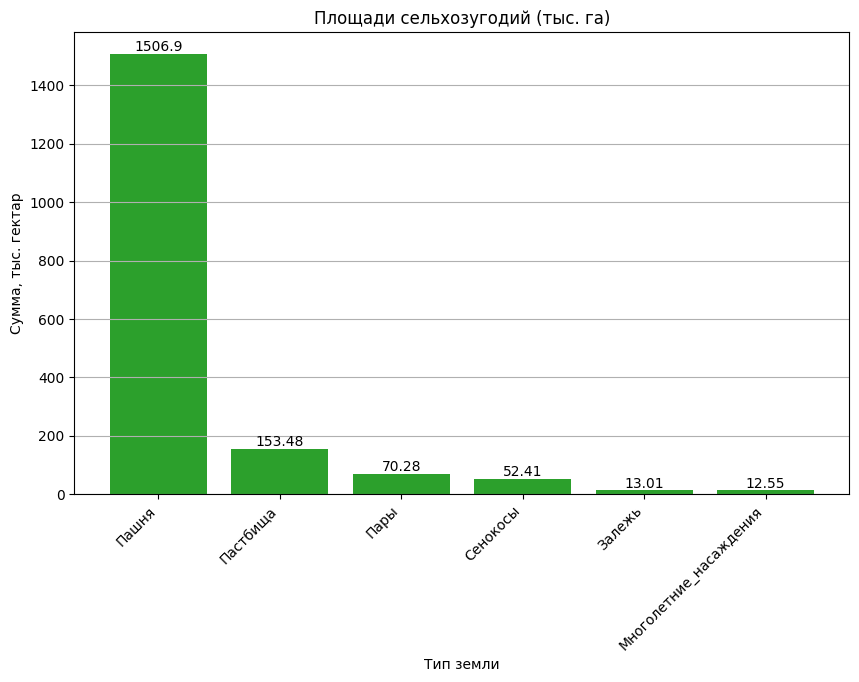

In [23]:
import matplotlib.pyplot as plt

land_df_filtered = land_df[(land_df['Тип_земли'] != 'Общая_площадь') & (land_df['Тип_земли'] != 'Сельскохозяйственные_угодья')]

plt.figure(figsize=(10, 6))
plt.bar(land_df_filtered['Тип_земли'], land_df_filtered['Сумма_тыс_га'], color='tab:green')
plt.xlabel('Тип земли')
plt.ylabel('Сумма, тыс. гектар')
plt.title('Площади сельхозугодий (тыс. га)')
for i, value in enumerate(land_df_filtered['Сумма_тыс_га']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.show()

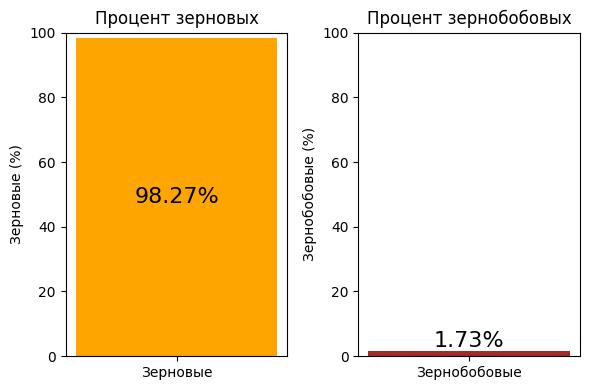

In [ ]:
Зернобобовые = (data['Зернобобовые_культуры'].sum()) / (data['Зерновые_и_зернобобовые'].sum()) * 100
Зерновые = 100 - Зернобобовые

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
bar = plt.bar(['Зерновые'], [Зерновые], color='orange')
plt.ylabel('Зерновые (%)')
plt.title('Процент зерновых')
plt.ylim(0, 100)
for b in bar:
    yval = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, yval/2, f'{Зерновые:.2f}%', ha='center',
             va='center', fontsize=16, color='black')
plt.subplot(1, 2, 2)
plt.bar(['Зернобобовые'], [Зернобобовые], color='brown')
plt.ylabel('Зернобобовые (%)')
plt.title('Процент зернобобовых')
plt.ylim(0, 100)
plt.text(0, Зернобобовые, f'{Зернобобовые:.2f}%', ha='center', va='bottom', fontsize=16, color='black')
plt.tight_layout()
plt.show()

In [13]:
col_cereals = ['Пшеница_озимая', 'Пшеница_яровая',
            'Рожь_озимая', 'Ячмень_озимый',
            'Кукуруза_на_зерно',]

land_cer = {}
land_cer['Зерновые'] = (data['Зерновые_и_зернобобовые'].sum() - data['Зернобобовые_культуры'].sum()) / 1000

for col in col_cereals:
    value = data[col].sum() / 1000
    land_cer[col] = value.round(2)

land_cer = pd.DataFrame(list(land_cer.items()), columns=['Тип_культуры', 'Площадь_тыс_га'])
land_cer['Доля от общей площади (%)'] = (land_cer['Площадь_тыс_га'] / land_cer.loc[0, 'Площадь_тыс_га'] * 100).round(2)
land_cer = land_cer.sort_values('Площадь_тыс_га', axis=0, ascending=False)
land_cer

,Тип_культуры,Площадь_тыс_га,Доля от общей площади (%)
0,Зерновые,725.815502,100.00
1,Пшеница_озимая,301.670000,41.56
5,Кукуруза_на_зерно,165.590000,22.81
2,Пшеница_яровая,17.630000,2.43
4,Ячмень_озимый,0.750000,0.10
3,Рожь_озимая,0.260000,0.04


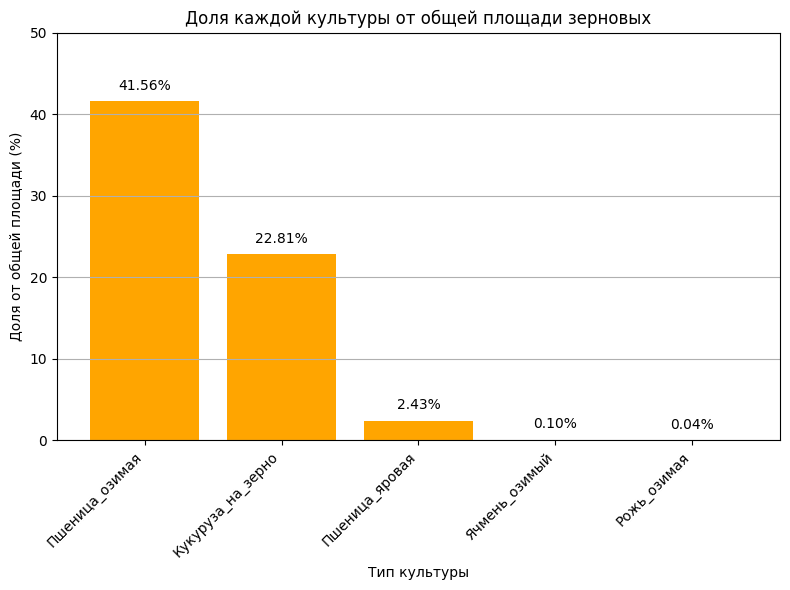

In [ ]:
land_cer = land_cer[land_cer['Тип_культуры'] != 'Зерновые']
plt.figure(figsize=(8, 6))
plt.bar(land_cer['Тип_культуры'], land_cer['Доля от общей площади (%)'], color='orange')
plt.xlabel('Тип культуры')
plt.ylabel('Доля от общей площади (%)')
plt.title('Доля каждой культуры от общей площади зерновых')
plt.ylim(0, 50)
for i, value in enumerate(land_cer['Доля от общей площади (%)']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [14]:
col_legumes = ['Зернобобовые_культуры', 'Горох']

land_l = {}

for col in col_legumes:
    value = data[col].sum() / 1000
    land_l[col] = value.round(2)

land_l = pd.DataFrame(list(land_l.items()), columns=['Тип_культуры', 'Площадь_тыс_га'])
land_l['Доля от общей площади (%)'] = (land_l['Площадь_тыс_га'] / land_l.loc[0, 'Площадь_тыс_га'] * 100).round(2)
land_l = land_l.sort_values('Площадь_тыс_га', axis=0, ascending=False)
land_l

,Тип_культуры,Площадь_тыс_га,Доля от общей площади (%)
0,Зернобобовые_культуры,12.76,100.00
1,Горох,6.62,51.88


In [15]:
col_t = ['Технические_культуры', 'Подсолнечник_на_зерно',
         'Свекла_сахарная', 'Соя', 'Рапс яровой']

land_t = {}

for col in col_t:
    value = data[col].sum() / 1000
    land_t[col] = value.round(2)

land_t = pd.DataFrame(list(land_t.items()), columns=['Тип_культуры', 'Площадь_тыс_га'])
land_t['Доля от общей площади (%)'] = (land_t['Площадь_тыс_га'] / land_t.loc[0, 'Площадь_тыс_га'] * 100).round(2)
land_t = land_t.sort_values('Площадь_тыс_га', axis=0, ascending=False)
land_t

,Тип_культуры,Площадь_тыс_га,Доля от общей площади (%)
0,Технические_культуры,449.73,100.00
3,Соя,210.94,46.90
1,Подсолнечник_на_зерно,143.36,31.88
2,Свекла_сахарная,77.28,17.18
4,Рапс яровой,3.80,0.84


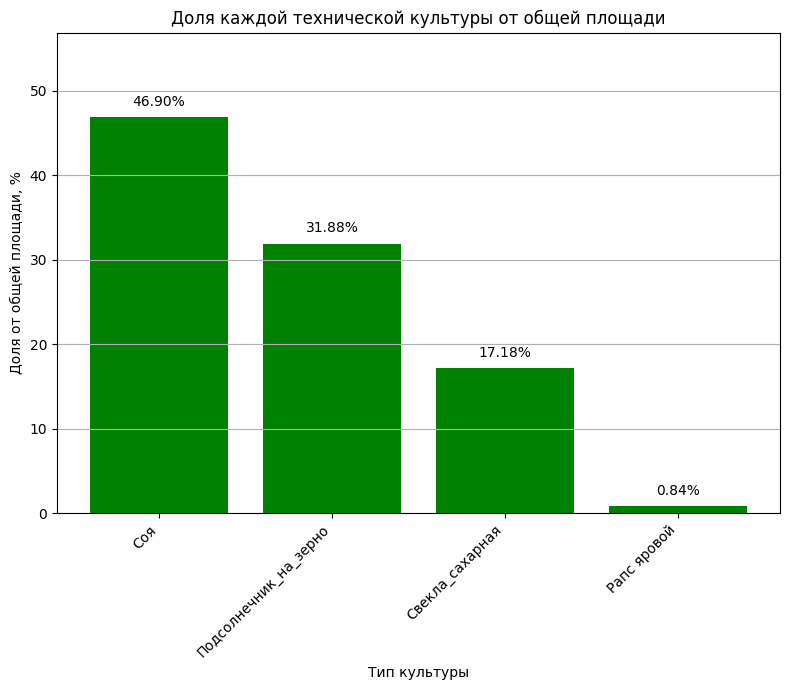

In [ ]:
land_t = land_t[land_t['Тип_культуры'] != 'Технические_культуры']

plt.figure(figsize=(8, 7))
plt.bar(land_t['Тип_культуры'], land_t['Доля от общей площади (%)'], color='green')
plt.xlabel('Тип культуры')
plt.ylabel('Доля от общей площади, %')
plt.title('Доля каждой технической культуры от общей площади')
plt.ylim(0, max(land_t['Доля от общей площади (%)']) + 10)
for i, value in enumerate(land_t['Доля от общей площади (%)']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['Работники', 'В_сельхозпроизводстве', 'Постоянные', 'Сезонные',
       'Общая_площадь', 'Сельскохозяйственные_угодья', 'Пашня', 'Пары',
       'Сенокосы', 'Пастбища', 'Многолетние_насаждения', 'Залежь',
       'Зерновые_и_зернобобовые', 'Пшеница_озимая', 'Пшеница_яровая',
       'Рожь_озимая', 'Ячмень_озимый', 'Кукуруза_на_зерно',
       'Зернобобовые_культуры', 'Горох', 'Подсолнечник_на_зерно', 'Rai',
       'ТипХоз', 'Технические_культуры', 'Свекла_сахарная', 'Соя',
       'Рапс яровой', 'Тракторы', 'КРС_молоко', 'КРС_мясной', 'Картофель',
       'Овощные_и_бахчевые', 'Кормовые_культуры', 'Плодовые_и_ягодные', 'КРС',
       'Коровы_молочные', 'Свиньи', 'Овцы', 'Козы', 'Птица', 'Лошади',
       'Кролики', 'Region', 'Kf_hoz', 'Kf_A200'],
      dtype='object')

In [16]:
categories = ['Общая_площадь', 'Зернобобовые_культуры',
              'Технические_культуры', 'Овощные_и_бахчевые', 'Картофель',
              'Кормовые_культуры', 'Плодовые_и_ягодные']

total_area_df = pd.DataFrame(columns=['Категория', 'Сумма_тыс_га'])

for category in categories:
    value = data[category].sum() / 1000
    total_area_df = total_area_df.append({'Категория': category, 'Сумма_тыс_га': value}, ignore_index=True)

zeronovye_value = (data['Зерновые_и_зернобобовые'].sum() - data['Зернобобовые_культуры'].sum()) / 1000
total_area_df = total_area_df.append({'Категория': 'Зерновые', 'Сумма_тыс_га': zeronovye_value}, ignore_index=True)
total_area_df = total_area_df.sort_values('Сумма_тыс_га', ascending=False)
total_area_df['Доля от общей площади (%)'] = (total_area_df['Сумма_тыс_га'] / total_area_df.loc[0, 'Сумма_тыс_га'] * 100).round(2)

total_area_df

,Категория,Сумма_тыс_га,Доля от общей площади (%)
0,Общая_площадь,1814.655224,100.00
7,Зерновые,725.815502,40.00
2,Технические_культуры,449.727943,24.78
5,Кормовые_культуры,188.495960,10.39
4,Картофель,37.566389,2.07
3,Овощные_и_бахчевые,20.000936,1.10
1,Зернобобовые_культуры,12.759050,0.70
6,Плодовые_и_ягодные,5.276070,0.29


In [17]:
other_sum = total_area_df['Сумма_тыс_га'].iloc[1:].sum()

other_row = {
    'Категория': 'Другое',
    'Сумма_тыс_га': total_area_df.loc[0, 'Сумма_тыс_га'] - other_sum,
    'Доля от общей площади (%)': 100 - total_area_df['Доля от общей площади (%)'].iloc[1:].sum()
}

total_area_df = total_area_df.append(other_row, ignore_index=True)

In [18]:
print(total_area_df['Категория'])

0            Общая_площадь
1                 Зерновые
2     Технические_культуры
3        Кормовые_культуры
4                Картофель
5       Овощные_и_бахчевые
6    Зернобобовые_культуры
7       Плодовые_и_ягодные
8                   Другое
Name: Категория, dtype: object


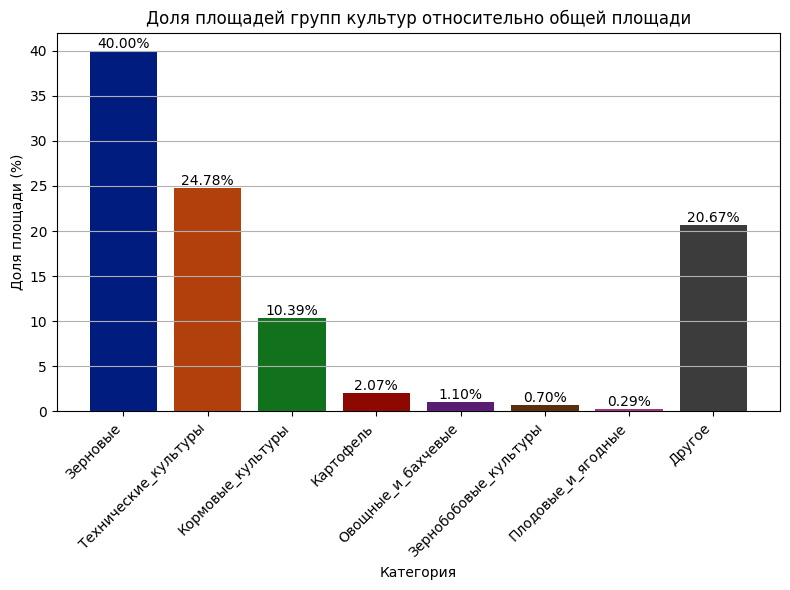

In [ ]:
import seaborn as sns

colors = sns.color_palette('dark')
plt.figure(figsize=(8, 6))
bars = plt.bar(total_area_df.loc[1:, 'Категория'], total_area_df.loc[1:, 'Доля от общей площади (%)'], color=colors)
for bar, label in zip(bars, total_area_df.loc[1:, 'Доля от общей площади (%)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Доля площадей групп культур относительно общей площади')
plt.xlabel('Категория')
plt.ylabel('Доля площади (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
data['Зерновые'] = data['Зерновые_и_зернобобовые'] - data['Зернобобовые_культуры']

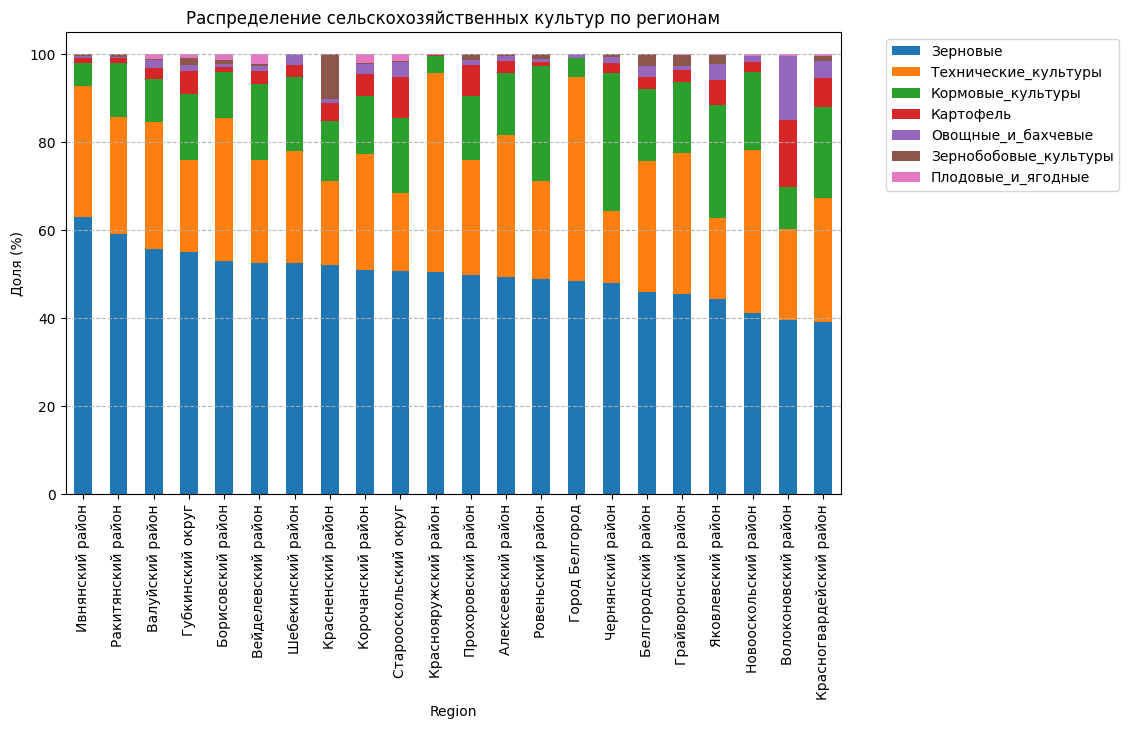

In [24]:
selected_columns = ['Зерновые', 'Технические_культуры', 'Кормовые_культуры', 'Картофель',
                     'Овощные_и_бахчевые', 'Зернобобовые_культуры', 'Плодовые_и_ягодные', 'Region']

df_selected = data[selected_columns]

df_grouped = df_selected.groupby('Region').sum()

df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

df_percentage = df_percentage.sort_values(by='Зерновые', ascending=False)

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Доля (%)')
ax.set_title('Распределение сельскохозяйственных культур по регионам')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.grid(True, linestyle='--', alpha=0.9)
plt.show()

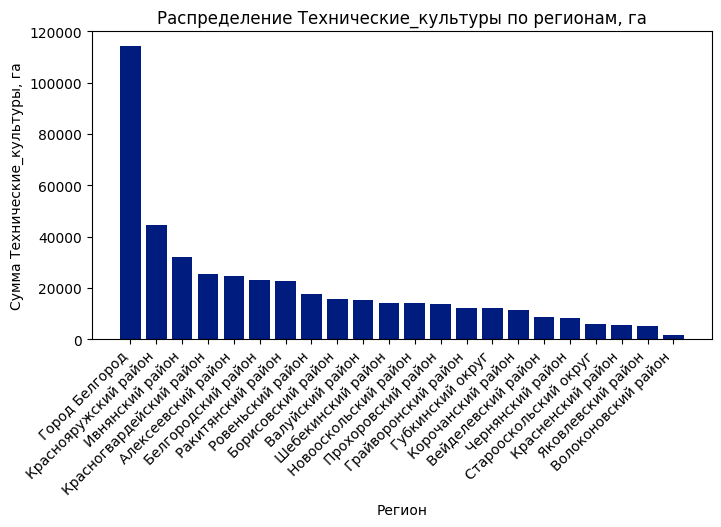

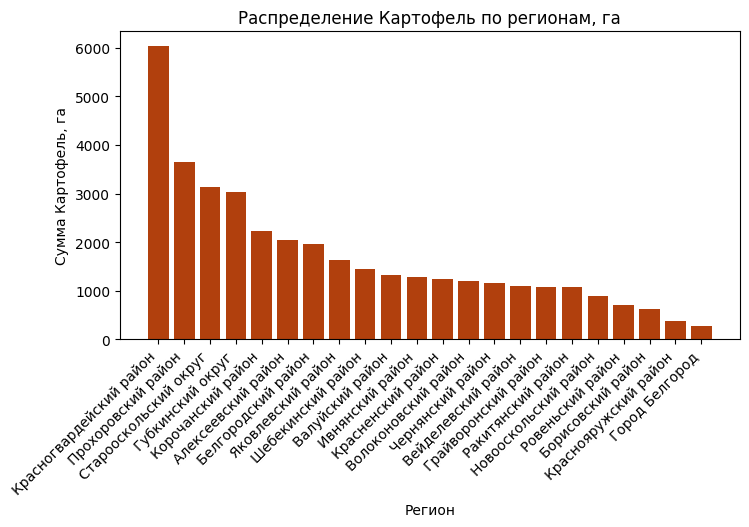

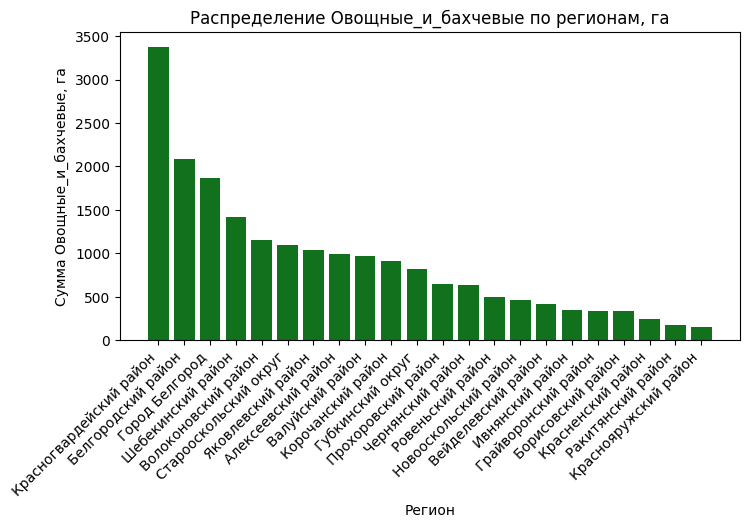

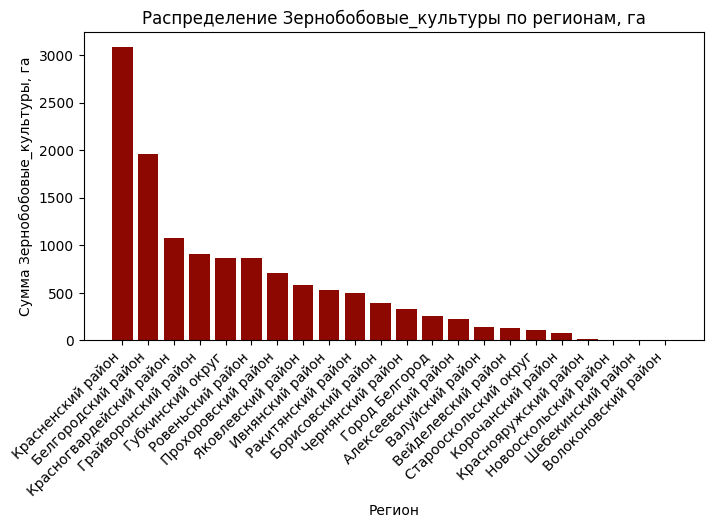

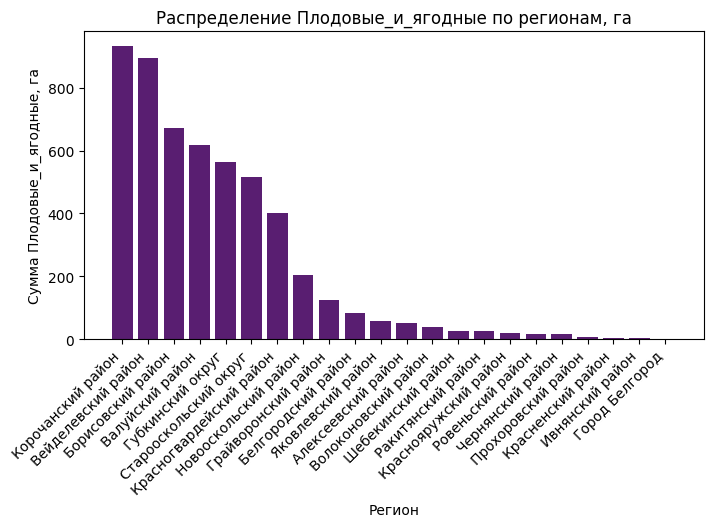

In [ ]:
selected_columns = ['Технические_культуры', 'Картофель',
                     'Овощные_и_бахчевые', 'Зернобобовые_культуры', 'Плодовые_и_ягодные', 'Region']

df_grouped = data[selected_columns].groupby('Region').sum()

colors = sns.color_palette('dark')

for i, culture in enumerate(df_grouped.columns):
    df_sorted = df_grouped.sort_values(by=culture, ascending=False)
    plt.figure(figsize=(8, 4))
    plt.bar(df_sorted.index, df_sorted[culture], color=colors[i])
    plt.title(f'Распределение {culture} по регионам, га')
    plt.xlabel('Регион')
    plt.ylabel(f'Сумма {culture}, га')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [20]:
import plotly.express as px

In [25]:
import geopandas as gpd

geojson_path = "/content/Белгородская область_Belgorod region.geojson"
gdf = gpd.read_file(geojson_path)

district_names = gdf["district"].unique()
district_names

array(['Алексеевка', 'Белгородский район', 'Борисовский район',
       'Валуйский', 'Вейделевский район', 'Волоконовский район',
       'Грайворонский район', 'Ивнянский район', 'Корочанский район',
       'Красненский район', 'Красногвардейский район',
       'Краснояружский район', 'Новооскольский район',
       'Прохоровский район', 'Ракитянский район', 'Ровеньский район',
       'Чернянский район', 'Шебекино', 'Яковлевский район', 'Белгород',
       'Губкинский', 'Старооскольский'], dtype=object)

In [26]:
district_mapping = {
    'Алексеевка': 'Алексеевский район',
    'Яковлевский район': 'Яковлевский район',
    'Ивнянский район': 'Ивнянский район',
    'Красненский район': 'Красненский район',
    'Корочанский район': 'Корочанский район',
    'Краснояружский район': 'Краснояружский район',
    'Ровеньский район': 'Ровеньский район',
    'Борисовский район': 'Борисовский район',
    'Белгородский район': 'Белгородский район',
    'Красногвардейский район': 'Красногвардейский район',
    'Прохоровский район': 'Прохоровский район',
    'Чернянский район': 'Чернянский район',
    'Валуйский': 'Валуйский район',
    'Ракитянский район': 'Ракитянский район',
    'Волоконовский район': 'Волоконовский район',
    'Грайворонский район': 'Грайворонский район',
    'Новооскольский район': 'Новооскольский район',
    'Вейделевский район': 'Вейделевский район',
    'Шебекино': 'Шебекинский район',
    'Белгород': 'Город Белгород',
    'Губкинский': 'Губкинский округ',
    'Старооскольский': 'Старооскольский округ'
}

gdf['district'] = gdf['district'].map(district_mapping)

output_geojson_path = "/content/Belgorod_region.geojson"
gdf.to_file(output_geojson_path, driver="GeoJSON")

In [27]:
geo_path = "/content/Belgorod_region.geojson"
gdf = gpd.read_file(geo_path)

# Сгруппируем данные по регионам и вычислим суммы для каждой категории
df_group = data.groupby('Region').agg({
    'Зерновые': 'sum',
    'Технические_культуры': 'sum',
    'Кормовые_культуры': 'sum'
}).reset_index()

In [28]:
merged_gdf = gdf.set_index('district').join(df_group.set_index('Region')).reset_index()

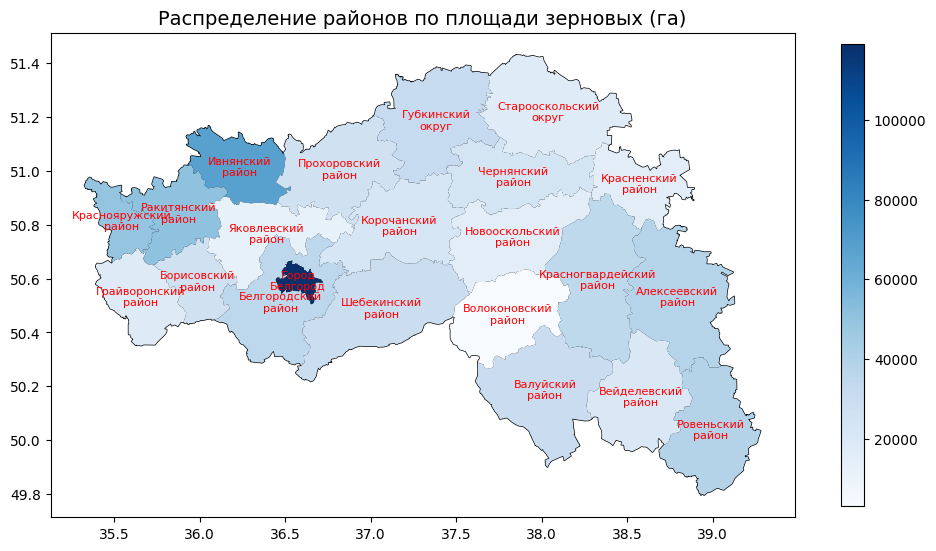

In [29]:
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='white')
merged_gdf.plot(ax=ax, column='Зерновые', cmap='Blues', legend=True, legend_kwds={'shrink': 0.5})
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['district']):
    lines = label.split(' ')
    label = '\n'.join(lines)
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='red')
ax.set_title("Распределение районов по площади зерновых (га)", fontsize=14)
plt.show()

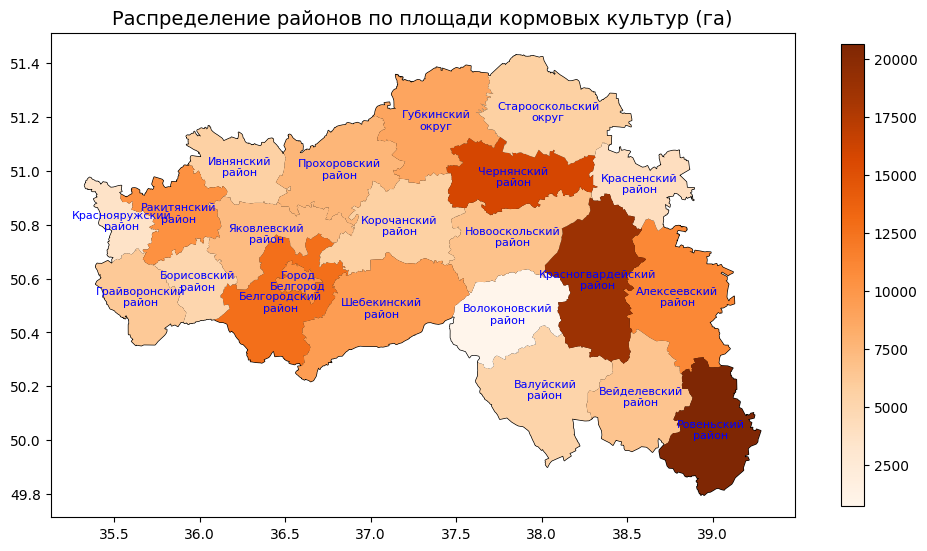

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='white')
merged_gdf.plot(ax=ax, column='Кормовые_культуры', cmap='Oranges', legend=True, legend_kwds={'shrink': 0.5})
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['district']):
    lines = label.split(' ')
    label = '\n'.join(lines)
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='blue')
ax.set_title("Распределение районов по площади кормовых культур (га)", fontsize=14)
plt.show()

In [41]:
data_strat = data

In [43]:
(data_strat['Кормовые_культуры'] == 0).sum()

213525

In [44]:
data_strat = data_strat[data_strat['Кормовые_культуры'] != 0]
data_strat.shape

(66228, 47)

In [45]:
data_strat = data_strat.sort_values(by=['Кормовые_культуры'])
count = data_strat.shape[0]
quantile1 = np.quantile(data_strat['Кормовые_культуры'], 0.25)
quantile1
quantile3 = np.quantile(data_strat['Кормовые_культуры'], 0.75)
quantile3
iqr = quantile3 - quantile1
iqr
h = (2*iqr) / (pow(count, 1/3))
max_index = data_strat['Кормовые_культуры'].max()
x = max_index / h

banch = []
strat_count = 0

while strat_count <= max_index:
    banch.append(strat_count)
    strat_count += h

# Add the last value even if strat_count exceeds max_index
if strat_count - h != max_index:
    banch.append(max_index)

In [46]:
len(banch)

1021791

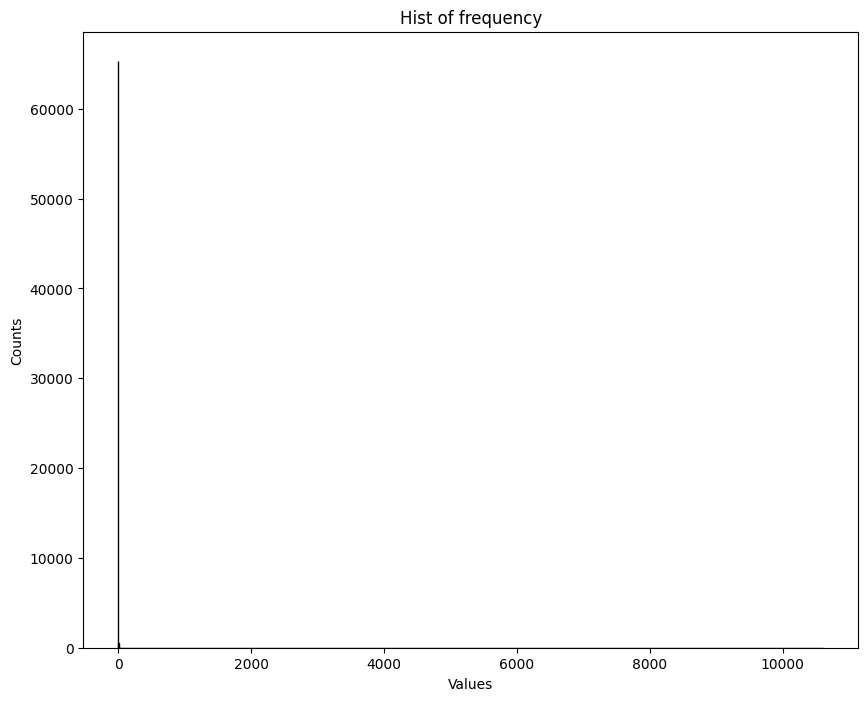

In [47]:
plt.figure(figsize=(10, 8), dpi=100)
plt.hist(data_strat['Кормовые_культуры'], bins=10000, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Hist of frequency')
plt.show()

In [ ]:
frequency_df = pd.DataFrame(columns=['Banch', 'Frequency'])

for i in range(len(banch) - 1):
    lower_bound = banch[i]
    upper_bound = banch[i + 1]
    count = len(data_strat[(data_strat['Кормовые_культуры'] >= lower_bound) & (data_strat['Кормовые_культуры'] < upper_bound)])
    frequency_df.loc[i] = [lower_bound, count]

# Add the last bucket
lower_bound = banch[-1]
count = len(data_strat[data_strat['Кормовые_культуры'] >= lower_bound])
frequency_df.loc[len(banch) - 1] = [lower_bound, count]
frequency_df.to_excel('Frequancy.xlsx')